# Análise Exploratória

## responder a seguinte questão de pesquisa:

### "Existe alguma correlação entre as regiões definidas pelos ângulos alpha e delta de um corpo celeste e a sua emissão luminosa, especificamente em relação à faixa de cor observada?"

In [14]:
#!pip install -r ../requirements.txt

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [16]:
df = pd.read_csv('../data/star_classification_10_full_p.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,a,b,c
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002,-0.654218,0.250033,0.713781
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797,0.348727,0.525619,-0.775960
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852,0.450750,0.286260,-0.845505
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515,-0.618062,0.700648,0.356499
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804,0.122096,-0.211234,-0.969780


### identificação das unidades de medida usadas

O alpha, também conhecido como ascensão reta, é o ângulo medido sobre o horizonte, no sentido horário (NLSO), com origem no Norte geográfico e extremidade no círculo vertical do astro. O azimute varia entre 0° e 360°.

Já o delta possui valores negativos, logo só pode se referir à declinação. A altura varia entre -90° e +90°. Podemos converter para distância polar para que varie entre 0° e 180°.

In [17]:
X = df[['alpha', 'delta','z', 'u', 'g', 'r', 'i', 'redshift', 'a', 'b', 'c']]

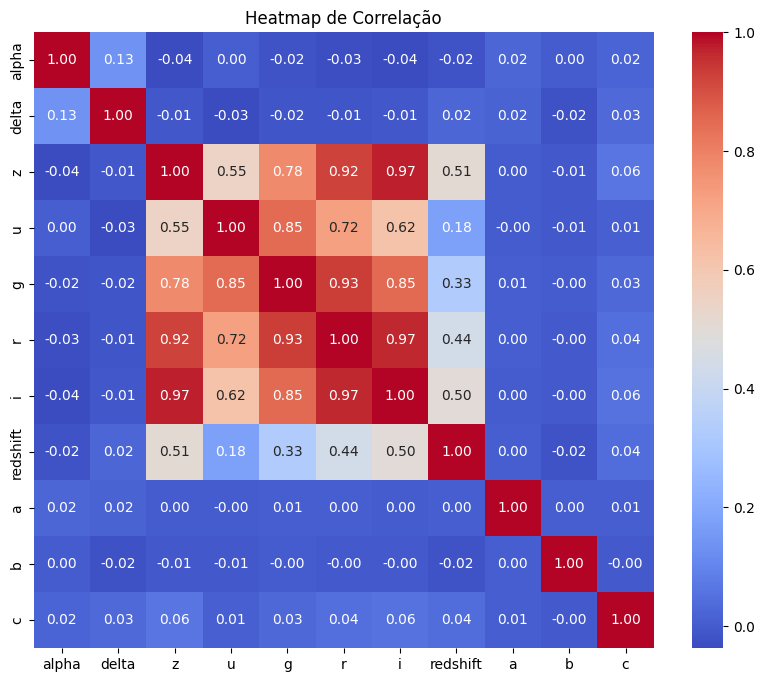

In [18]:
pearson_corr = X.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

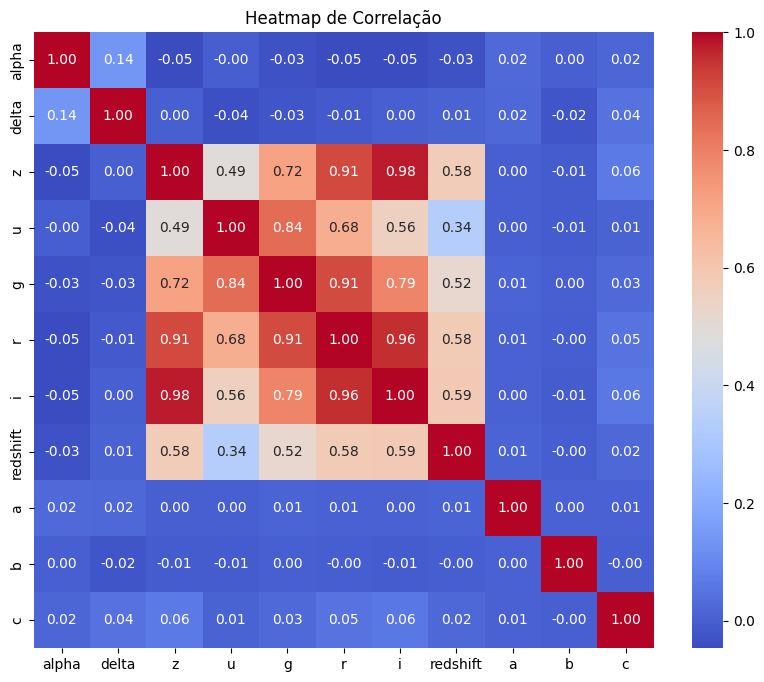

In [19]:
pearson_corr = X.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

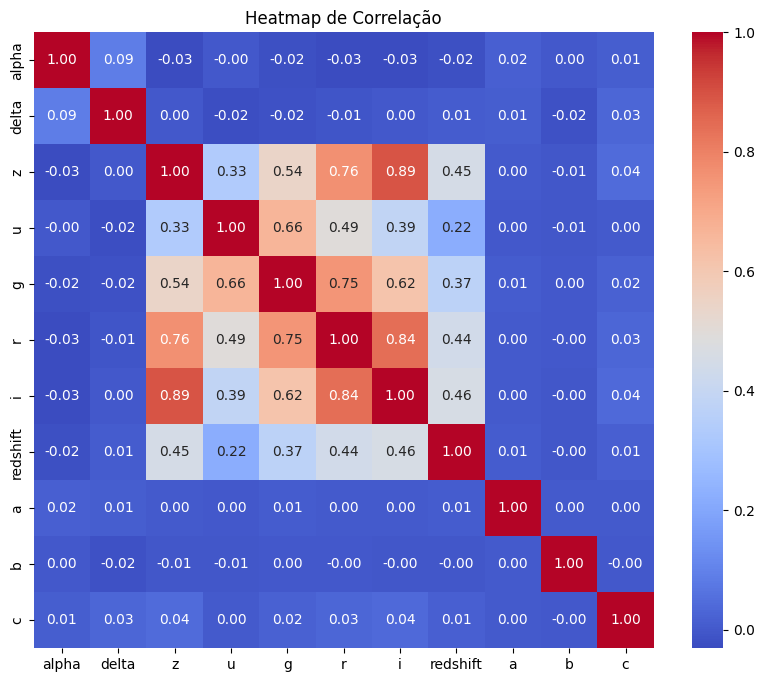

In [20]:
pearson_corr = X.corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

In [34]:
light_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']

i = 0
j = i
p_value_mat = []

while i < len(light_cols):
    temp = []
    while j < len(light_cols):
        correlation_coefficient, p_value = pearsonr(X[light_cols[i]], X[light_cols[j]])
        temp.append(p_value)
        j += 1
    i += 1
    j = 0
    p_value_mat.append(temp)

In [32]:
p_value_mat

[[0.0, 0.0, 0.0, 0.0, 0.0, 3.871403177645763e-70],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.164811219889331e-249],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [3.871403177645763e-70, 1.164811219889331e-249, 0.0, 0.0, 0.0, 0.0]]

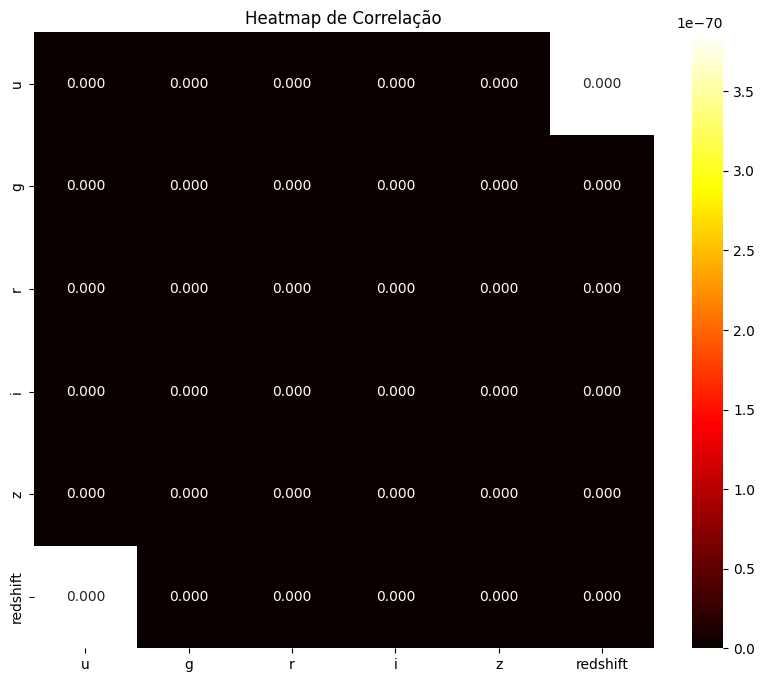

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_mat, annot=True, cmap='hot', fmt=".3f", xticklabels=light_cols, yticklabels=light_cols)
plt.title('Heatmap de Correlação')
plt.show()

# Conclusão